## 1. Introduction:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In [1]:
#Import libraries:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data
data = pd.read_csv('./train.csv')
data.head()

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [4]:
# Since the Date is in object type, we'll have to convert it back to datetime64 type
data['Date'] = pd.to_datetime(data['Date'],format = '%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null datetime64[ns]
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [5]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## 2. Data manipulation:

In [6]:
# Show statistic report of the data:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.429727,321.908651,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,3.998341,1.997391,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.818972,3849.926175,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.145946,464.411734,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.830107,0.375539,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.381515,0.485759,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.178647,0.383056,0.0,0.0,0.0,0.0,1.0


In [7]:
# Check for null value:
data.isnull().any()

Store            False
DayOfWeek        False
Date             False
Sales            False
Customers        False
Open             False
Promo            False
StateHoliday     False
SchoolHoliday    False
dtype: bool

In [8]:
# How many values in "Date" column?
data['Date'].nunique()

942

In [9]:
data.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [10]:
#Since there's only 942 values, we'll sum all the sales in the same day into one.
#However, we need to retain others column values.
train = data.groupby(by = ['Store', 'DayOfWeek', 'Date', 'Open', 'Promo','StateHoliday', 'SchoolHoliday'],as_index = False)['Sales', 'Customers'].sum()


In [11]:
#Let's look at our data again
train.head()

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales,Customers
0,1,1,2013-01-07,1,1,0,1,7176,785
1,1,1,2013-01-14,1,0,0,0,4717,616
2,1,1,2013-01-21,1,1,0,0,5394,607
3,1,1,2013-01-28,1,0,0,0,4055,549
4,1,1,2013-02-04,1,1,0,0,7032,762


We have a really interesting column which is 'Open'. In the column, there are 2 values 1 and 0 indicate Open(1) or Closed (0). In order to avoid biased, we'll drop all closed date for better acuracy.

In [12]:
train[train['Open']==0].shape

(172817, 9)

There're also dates where the store opened but the sale values were 0. We'll have to take a look at that too.

In [13]:
train[(train['Sales']==0) & (train['Open']==1)].shape

(54, 9)

We'll drop all these values for better acuracy.

In [14]:
train = train[(train["Open"] != 0) & (train['Sales'] != 0)]
train.shape

(844338, 9)

In [15]:
train.sample(10)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Sales,Customers
827415,908,6,2015-07-11,1,0,0,0,1804,208
615617,676,5,2013-05-24,1,0,0,0,5828,1524
220894,244,2,2015-07-28,1,1,0,1,5943,523
194646,215,6,2014-03-01,1,0,0,0,7000,557
487447,535,2,2015-02-03,1,1,0,0,10363,1086
67769,75,1,2014-08-25,1,0,0,0,8458,834
927506,1017,6,2015-05-02,1,0,0,0,5869,812
636712,699,5,2013-01-11,1,1,0,1,9706,1064
306539,337,4,2015-02-19,1,1,0,0,4343,357
85624,94,5,2014-01-24,1,1,0,0,6648,625


In [16]:
#We'll use the date column as index
train = train.set_index('Date')


In [17]:
train.head(10)

,Store,DayOfWeek,Open,Promo,StateHoliday,SchoolHoliday,Sales,Customers
Date,,,,,,,,
2013-01-07,1,1,1,1,0,1,7176,785
2013-01-14,1,1,1,0,0,0,4717,616
2013-01-21,1,1,1,1,0,0,5394,607
2013-01-28,1,1,1,0,0,0,4055,549
2013-02-04,1,1,1,1,0,0,7032,762
2013-02-11,1,1,1,0,0,0,4409,599
2013-02-18,1,1,1,1,0,0,6407,710
2013-02-25,1,1,1,0,0,0,4038,534
2013-03-04,1,1,1,1,0,0,7675,840


In [18]:
#Group data using pd.grouper with freq = 'M'
#This will lead to the only data we can use are index (Date) and Sales
train_m = train.groupby(pd.Grouper(freq= 'M')).sum()

In [19]:
train_m.index

DatetimeIndex(['2013-01-31', '2013-02-28', '2013-03-31', '2013-04-30',
               '2013-05-31', '2013-06-30', '2013-07-31', '2013-08-31',
               '2013-09-30', '2013-10-31', '2013-11-30', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-31', '2014-06-30', '2014-07-31', '2014-08-31',
               '2014-09-30', '2014-10-31', '2014-11-30', '2014-12-31',
               '2015-01-31', '2015-02-28', '2015-03-31', '2015-04-30',
               '2015-05-31', '2015-06-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', freq='M')

In [20]:
train_m.head()

,Store,DayOfWeek,Open,Promo,SchoolHoliday,Sales,Customers
Date,,,,,,,
2013-01-31,16118876,101277,28865,11062,3886,180132207,20380423
2013-02-28,14886979,93735,26682,11099,2656,171534275,19244468
2013-03-31,15561002,100857,27891,15558,4576,201180369,21969462
2013-04-30,15557765,96266,27878,13307,4294,183431432,20882360
2013-05-31,14617034,96167,26199,12677,3418,185411063,20723886


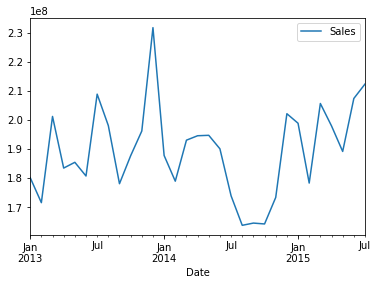

In [21]:
train_m.plot(y=['Sales'])

TypeError: 'AxesSubplot' object is not callable

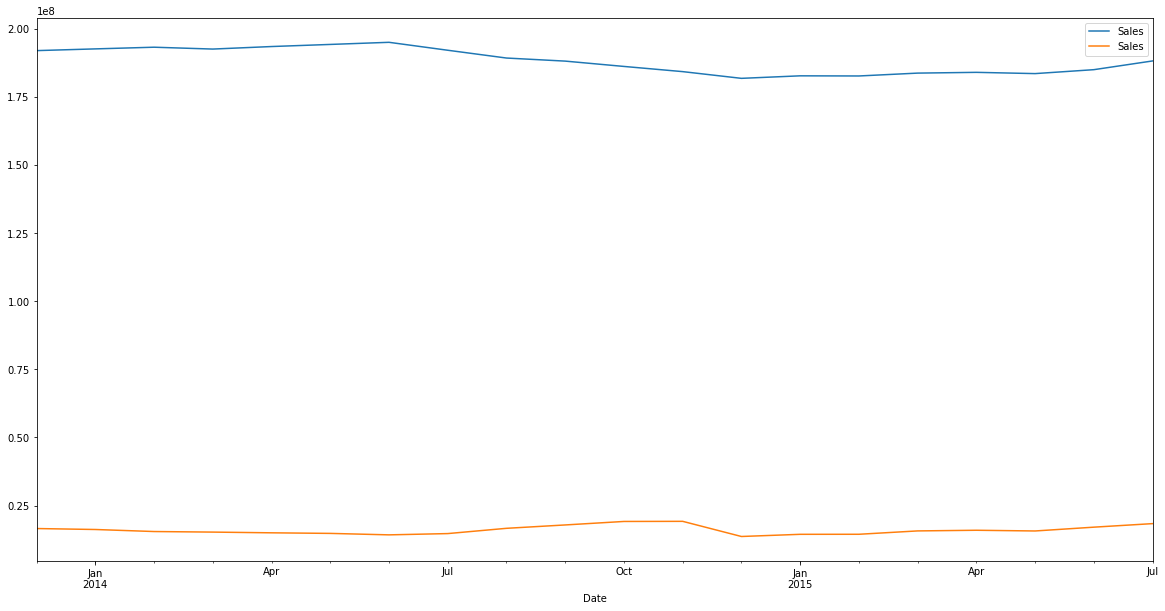

In [22]:
plt.figure(figsize = [20,10])
ax = train_m['Sales'].rolling(window = 12).mean().dropna().plot(legend = 'Rolling mean')
train_m['Sales'].rolling(window = 12).std().dropna().plot(legend = 'Rolling std')(ax = ax)
plt.legend()
plt.show()

## Decomposing Time Series

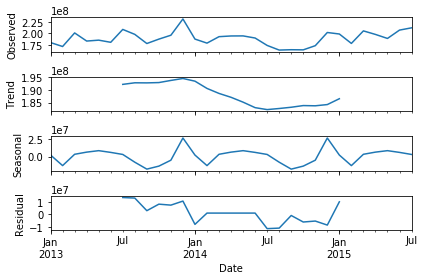

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose 
# Decompose item_cnt_day with freq=12, model='additive'
res = seasonal_decompose(train_m['Sales'],freq=12, model = 'additive')
fig = res.plot();

## Stationarity Test

In [24]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

In [26]:
test_stationarity(train_m['Sales'])

Results of Dickey-Fuller Test:
Test Statistic                 -3.544365
p-value                         0.006918
#Lags Used                      0.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


p-value is suitable for modeling. 

## 3. Modeling

In [28]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARMA


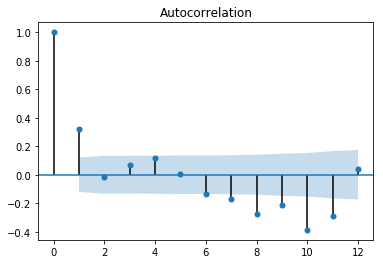

In [30]:
plot_acf(train_m['Sales'],lags= 12, alpha = 0.5);

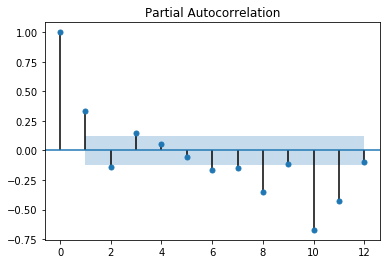

In [33]:
plot_pacf(train_m['Sales'],lags = 12 , alpha = 0.5);

In [34]:
best_aic = np.inf
best_order = None
best_model = None

rng = range(5)
for i in rng:
    for j in rng:
        if i == j == 0:
            continue
        try:
            # Create and train ARMA model with order=(i, j)
            model = ARMA(train_m['Sales'],order = (i,j)).fit()
            aic = model.aic
            if aic < best_aic:
                best_aic = aic
                best_order = (i, j)
                best_model = model
        except: continue
print('AIC: {:6.5} | order: {}'.format(best_aic, best_order))

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:674: RuntimeWarning: invalid value encountered in double_scalars
  tmp[kiter] = (macoefs[kiter]-b *macoefs[j-kiter-1])/(1-b**2)
/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:676: RuntimeWarning: divide by zero encountered in log
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in subtract
  **kwargs)).imag/2./hess[i, j]
/anaconda3/lib/python3.7/site-packages/statsmodels/tools/numdiff.py:243: RuntimeWarning: invalid value encountered in multiply
  **kwargs)).imag/2./hess[i, j]
/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no b

AIC: 1115.4 | order: (0, 1)


/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


## 4. Summary

In [35]:
predict = ARMA(train_m['Sales'],order =(0,1)).fit().predict(start = 0, end = 25)

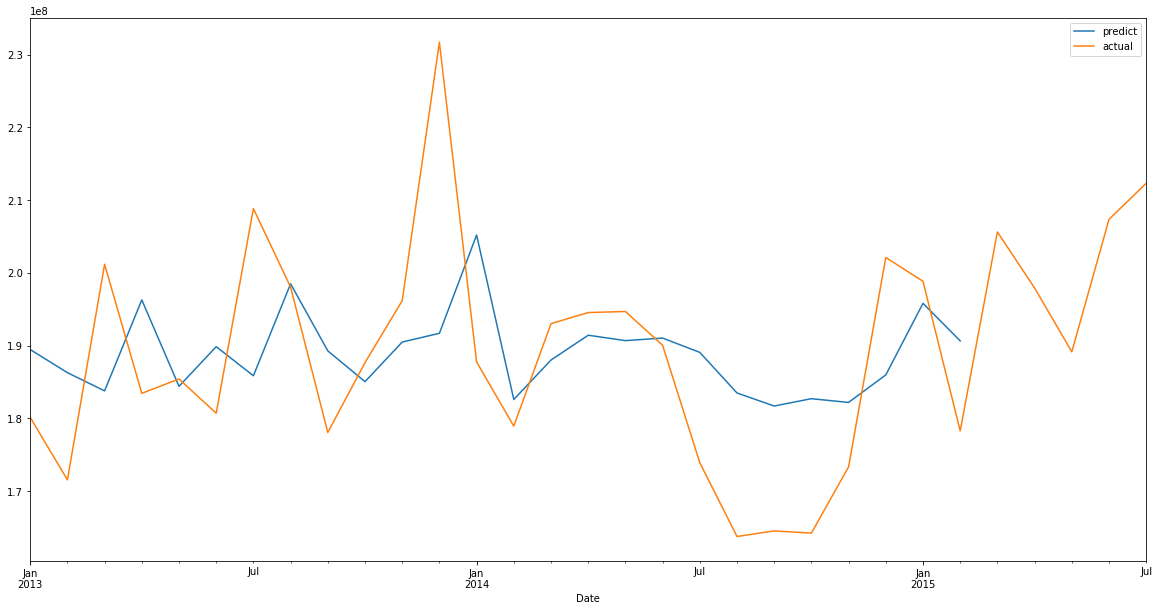

In [37]:
plt.figure(figsize = [20,10])
predict.plot(label='predict')
train_m['Sales'].plot(label = 'actual')
plt.legend();